# Machine Learning

*Лектор: Екатерина Лобачева*

*Факультет экономических наук НИУ ВШЭ, 2017-18 учебный год*

[Страница курса](http://wiki.cs.hse.ru/Машинное_обучение_(факультет_экономических_наук%29)

## Домашнее задание №1
Задание основано на материалах курса [Data analysis (Software Engineering)](http://wiki.cs.hse.ru/Data_analysis_(Software_Engineering%29) (ФКН НИУ ВШЭ).

Вам необходимо анализировать набор данных [adult.data](http://archive.ics.uci.edu/ml/datasets/Adult) (источник: UCI Machine Learning Repository) с помощью Python, pandas, numpy, scipy.

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*).

**Подсказка.** Файл [adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) является CSV-файлом, но в нём отсутствуют имена переменных — они (вместе с описаниями) приводятся в отдельном файле [adult.names](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). При загрузке датафрейма с помощью `pd.read_csv` используйте параметры `header=None` (чтобы первая строка не воспринималась как строка с именами переменных) и `names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]`. Чтобы убрать лишние пробелы после запятых, которые есть в файле, следует добавить опцию `skipinitialspace=True`.

### Вопрос 1
Сколько мужчин и женщин в выборке?

In [8]:
import pandas as pd
data = pd.read_csv("adult.data", header = None, names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace = True)
man = data[data['sex'] == 'Male']
women = data[data['sex'] == 'Female']

import numpy as np
manCount = man.shape[0]
womenCount = women.shape[0]
print(manCount, womenCount)

21790 10771


### Вопрос 2
Каков средний возраст мужчин?


In [7]:
import pandas as pd
data = pd.read_csv("adult.data", header = None, names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace = True)
man= data[data['sex'] == 'Male']
print(man['age'].mean())

39.43354749885268


### Вопрос 3
Какова доля граждан США?

In [6]:
import pandas as pd
data = pd.read_csv("adult.data", header = None, names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace = True)
country = data[data['native-country']=='United-States']
print(country.shape[0] / data.shape[0])

0.895857006848684


### Вопрос 4
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

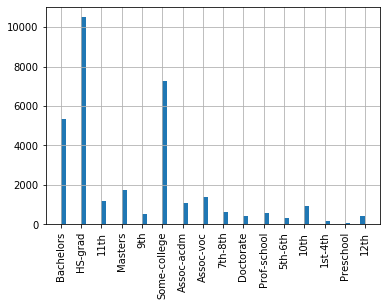

In [11]:
import pandas as pd
%config IPCompleter.greedy = True
data = pd.read_csv("adult.data", header = None, names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace = True)
data.education.hist(xrot = 90, bins = 60)

### Вопрос 5
Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей?

In [10]:
import pandas as pd
data = pd.read_csv("adult.data", header = None, names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace = True)
med = data.groupby('marital-status')['fnlwgt'].mad().Divorced
stand = data.groupby('marital-status')['fnlwgt'].std().Divorced
print(med, stand)

75755.37971106575 105646.78945933616


### Вопрос 6
Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?

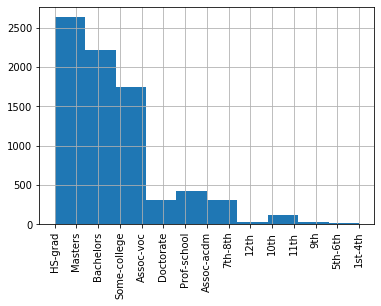

In [16]:
import pandas as pd
data = pd.read_csv("adult.data", header = None, names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace = True)
people = data[data['50K'] == '>50K']
people.education.hist(xrot = 90);

### Вопрос 7
Каков максимальный возраст мужчин и женщин каждой расы?

In [19]:
import pandas as pd
data = pd.read_csv("adult.data", header = None, names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace = True)
man = data[data['sex'] == 'Male'].groupby('race').max().age
women = data[data['sex'] =='Female'].groupby('race').max().age
print(man, women)

race
Amer-Indian-Eskimo    82
Asian-Pac-Islander    90
Black                 90
Other                 77
White                 90
Name: age, dtype: int64 race
Amer-Indian-Eskimo    80
Asian-Pac-Islander    75
Black                 90
Other                 74
White                 90
Name: age, dtype: int64


### Вопрос 8
Люди из каких стран работают как фермеры/рыбаки?

In [20]:
import pandas as pd
data = pd.read_csv("adult.data", header = None, names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace = True)
farmers = data[data['occupation'] == 'Farming-fishing']['native-country'].unique();
print(farmers)

['United-States' 'Cambodia' 'Poland' 'Guatemala' 'Mexico' 'England' '?'
 'Philippines' 'Italy' 'Puerto-Rico' 'Vietnam' 'Germany' 'Japan' 'Canada'
 'Yugoslavia' 'Cuba' 'Portugal' 'El-Salvador' 'Hong' 'Ireland' 'France']


### Вопрос 9
Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?


In [21]:
import pandas as pd
data = pd.read_csv("adult.data", header = None, names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace = True)
man = data[data['sex'] == 'Male']
manBachelors = man[man['education'] == 'Bachelors'].education.count()
manMasters = man[man['education'] == 'Masters'].education.count()
women = data[data['sex'] == 'Female']
womenBachelors = women[women['education'] == 'Bachelors'].education.count()
womenMasters = women[women['education'] == 'Masters'].education.count()
print((manBachelors / manMasters) > (womenBachelors / womenMasters))

True


### Вопрос 10
Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?

In [23]:
import pandas as pd
data = pd.read_csv("adult.data", header = None, names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace = True)
hours = data['hours-per-week'].max()
people = data[data['hours-per-week'] == hours]['50K'].count();
money = data[data['hours-per-week'] == hours]['50K']
print(hours, people, money)

99 85 935       >50K
1172      >50K
1887      >50K
3578      >50K
4086     <=50K
         ...  
30992    <=50K
31681     >50K
31699    <=50K
32469    <=50K
32531    <=50K
Name: 50K, Length: 85, dtype: object
